# utils

In [1]:
import csv
import numpy as np


def write_W_list_to_csv(data, filename):
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        # Write each row from the 2D list into the CSV
        for w in data:
          writer.writerows(w[0])
def write_b_list_to_csv(data, filename):
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        # Write each row from the 2D list into the CSV
        for w in data:
          writer.writerows(w[1])

# Calculate accuracy on training and validation sets
def calculate_accuracy(X, Y,nn):
    correct_predictions = 0
    for i in range(X.shape[0]):
        x = X[i]
        y = Y[i]
        A3 = nn.forward(x)
        predicted_class = np.argmax(A3)  # Get the predicted class
        actual_class = np.argmax(y)  # Get the actual class
        if predicted_class == actual_class:
            correct_predictions += 1
    accuracy = correct_predictions / X.shape[0]
    return accuracy

# neural network

In [2]:
import numpy as np

def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return Z > 0

def softmax(Z):
    expZ = np.exp(Z -max(Z))  # Stability improvement for large values
    return expZ / expZ.sum(axis=0, keepdims=True)

# Loss function (cross-entropy)
def cross_entropy_loss(A, Y):
    return -np.sum(Y * np.log(A + 1e-8))

# Neural Network class
class NeuralNetwork:
    def __init__(self):
        self.global_gradients=[]
        self.layers = []
        self.activations = []
        self.weights = []
        self.biases = []
        self.layer_outputs = []  # Cache for forward pass

    def add_layer(self, input_size, output_size, w,b, activation='relu'):
        # Initialize weights and biases
        # W = np.random.randn(input_size, output_size) * 0.01
        # b = np.zeros((output_size,))
        self.weights.append(w)
        self.biases.append(b)

        # Store the activation function for this layer
        if activation == 'relu':
            self.activations.append(relu)
        elif activation == 'softmax':
            self.activations.append(softmax)
        else:
            raise ValueError(f"Unknown activation function: {activation}")

        # Keep track of layers
        self.layers.append((input_size, output_size, activation))

    def forward(self, X):
        self.layer_outputs = []
        A = X

        for i, activation in enumerate(self.activations):
            Z = np.dot(A, self.weights[i]) + self.biases[i]
            A = activation(Z)
            self.layer_outputs.append((Z, A))

        return A

    def compute_loss(self, A, Y):
        return cross_entropy_loss(A, Y)

    def backward(self, X, Y):
      gradients = []
      m = Y.shape[0]  # Number of samples (assuming batch size is 1 in your case)

      # Backpropagate through layers
      dA = self.layer_outputs[-1][1] - Y  # Output layer error (A - Y)

      for i in reversed(range(len(self.layers))):
          Z, A = self.layer_outputs[i]
          dZ = dA

          # Compute gradients
          # Reshape dZ and the previous layer's output to ensure correct matrix multiplication
          A_prev = self.layer_outputs[i-1][1] if i > 0 else X
          dW = np.dot(A_prev.T.reshape(-1, 1), dZ.reshape(1, -1)) / m
          db = np.sum(dZ, axis=0, keepdims=True) / m

          self.global_gradients.append([dW,db])

          gradients.insert(0, [dW, db])  # Insert gradients at the beginning

          if i > 0:  # If not the input layer
              dA = np.dot(dZ, self.weights[i].T) * relu_derivative(self.layer_outputs[i-1][0])

      return gradients


    def update_parameters(self, gradients, learning_rate):
    # Update weights and biases using gradients
      for i, (dW, db) in enumerate(gradients):
          self.weights[i] -= learning_rate * dW
          self.biases[i] -= learning_rate * db.squeeze()  # Use squeeze() to match dimensions


# task 1-a

In [5]:
import numpy as np

X = np.array([-1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1])  # Input data point
label = 3  # Class label
one_hot_label = np.zeros((1, 4))
one_hot_label[0, label - 1] = 1  # One-hot encoding for class 3
one_hot_label=[0, 0, 0, 1]

W0 = []
with open('Task_1/a/w.csv', 'r') as file:
    for line in file:
        # Split by delimiter (comma), skip the first column, and convert remaining values to float
        values = line.strip().split(',')[1:]
        W0.append([float(value) for value in values])

# Reading b0
b0 = []
with open('Task_1/a/b.csv', 'r') as file:
    for line in file:
        # Split by delimiter (comma), skip the first column, and convert remaining values to float
        values = line.strip().split(',')[1:]
        b0.append([float(value) for value in values])

W1= np.array(W0[:14])
W2= np.array(W0[14:114])
W3=np.array(W0[114:])
b1=np.array(b0[0])
b2=np.array(b0[1])
b3=np.array(b0[2])
  # Example usage
if __name__ == "__main__":
    # Initialize network
    nn = NeuralNetwork()

    # Define network structure
    nn.add_layer(input_size=14, output_size=100,w=W1,b=b1, activation='relu')
    nn.add_layer(input_size=100,w=W2,b=b2, output_size=40 ,activation='relu')
    nn.add_layer(input_size=40,w=W3,b=b3, output_size=4, activation='softmax')  # Output layer

    # Input data (X) and one-hot encoded labels (Y)
    X = np.array([-1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1])  # Example input data

    label = 3  # Example class label
    Y = np.zeros((1, 4))  # One-hot encoding
    Y[0, label ] = 1
    print(Y)


    # Forward propagation
    A = nn.forward(X)
    print("Output after forward propagation:", A)

    # Compute loss
    loss = nn.compute_loss(A, Y)
    print(f"Loss: {loss}")

    # Backward propagation
    gradients = nn.backward(X, Y)

    # Update parameters
    nn.update_parameters(gradients, learning_rate=0.01)

    # gradients
    print("Gradients for W1:", gradients[0][0],gradients[0][0].shape)
    write_W_list_to_csv(nn.global_gradients, '210554M_Task_1a_dw.csv')
    write_b_list_to_csv(nn.global_gradients, '210554M_Task_1a_db.csv')

[[0. 0. 0. 1.]]
Output after forward propagation: [1.81297987e-158 5.20887762e-137 1.00000000e+000 2.00080740e-085]
Loss: 18.420680743952367
Gradients for W1: [[ 0.         -5.30299909  0.         ... -4.91587664 -2.37825473
   8.75206121]
 [ 0.          5.30299909  0.         ...  4.91587664  2.37825473
  -8.75206121]
 [ 0.          5.30299909  0.         ...  4.91587664  2.37825473
  -8.75206121]
 ...
 [ 0.         -5.30299909  0.         ... -4.91587664 -2.37825473
   8.75206121]
 [ 0.          5.30299909  0.         ...  4.91587664  2.37825473
  -8.75206121]
 [ 0.          5.30299909  0.         ...  4.91587664  2.37825473
  -8.75206121]] (14, 100)


# task 1-b

In [6]:
import numpy as np

W0 = []
with open('Task_1/b/w-100-40-4.csv', 'r') as file:
    for line in file:
        # Split by delimiter (comma), skip the first column, and convert remaining values to float
        values = line.strip().split(',')[1:]
        W0.append([float(value) for value in values])

# Reading b0
b0 = []
with open('Task_1/b/b-100-40-4.csv', 'r') as file:
    for line in file:
        # Split by delimiter (comma), skip the first column, and convert remaining values to float
        values = line.strip().split(',')[1:]
        b0.append([float(value) for value in values])

W1= np.array(W0[:14])
W2= np.array(W0[14:114])
W3=np.array(W0[114:])
b1=np.array(b0[0])
b2=np.array(b0[1])
b3=np.array(b0[2])
  # Example usage
if __name__ == "__main__":
    # Initialize network
    nn = NeuralNetwork()

    # Define network structure
    nn.add_layer(input_size=14, output_size=100,w=W1,b=b1, activation='relu')
    nn.add_layer(input_size=100,w=W2,b=b2, output_size=40 ,activation='relu')
    nn.add_layer(input_size=40,w=W3,b=b3, output_size=4, activation='softmax')  # Output layer

    # Input data (X) and one-hot encoded labels (Y)
    X = np.array([-1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1])  # Example input data

    label = 3  # Example class label
    Y = np.zeros((1, 4))  # One-hot encoding
    Y[0, label ] = 1
    print(Y)


    # Forward propagation
    A = nn.forward(X)
    print("Output after forward propagation:", A)

    # Compute loss
    loss = nn.compute_loss(A, Y)
    print(f"Loss: {loss}")

    # Backward propagation
    gradients = nn.backward(X, Y)

    # Update parameters
    nn.update_parameters(gradients, learning_rate=0.01)

    # gradients

#     print("Gradients for W1:", gradients[0][0],gradients[0][0].shape)
    nn.global_gradients.reverse()

    write_W_list_to_csv(nn.global_gradients, '210554M_Task_1b_dw.csv')
    write_b_list_to_csv(nn.global_gradients, '210554M_Task_1b_db.csv')

[[0. 0. 0. 1.]]
Output after forward propagation: [1.88258338e-16 1.08619921e-68 1.47340802e-78 1.00000000e+00]
Loss: -9.999999667180688e-09


# task 2

Training the neural network... for lr = 0.001
Epoch 1/50, Train Loss: 3.9359, Val Loss: 1.5560, Train Accuracy: 0.5171, Val Accuracy: 0.5125
Epoch 2/50, Train Loss: 1.2039, Val Loss: 1.1146, Train Accuracy: 0.5665, Val Accuracy: 0.5574
Epoch 3/50, Train Loss: 0.9716, Val Loss: 0.9578, Train Accuracy: 0.6033, Val Accuracy: 0.5965
Epoch 4/50, Train Loss: 0.8498, Val Loss: 0.8624, Train Accuracy: 0.6402, Val Accuracy: 0.6233
Epoch 5/50, Train Loss: 0.7637, Val Loss: 0.7973, Train Accuracy: 0.6726, Val Accuracy: 0.6526
Epoch 6/50, Train Loss: 0.6962, Val Loss: 0.7455, Train Accuracy: 0.7014, Val Accuracy: 0.6798
Epoch 7/50, Train Loss: 0.6406, Val Loss: 0.7006, Train Accuracy: 0.7252, Val Accuracy: 0.7005
Epoch 8/50, Train Loss: 0.5938, Val Loss: 0.6623, Train Accuracy: 0.7425, Val Accuracy: 0.7228
Epoch 9/50, Train Loss: 0.5543, Val Loss: 0.6290, Train Accuracy: 0.7587, Val Accuracy: 0.7353
Epoch 10/50, Train Loss: 0.5203, Val Loss: 0.5992, Train Accuracy: 0.7784, Val Accuracy: 0.7457
Epo

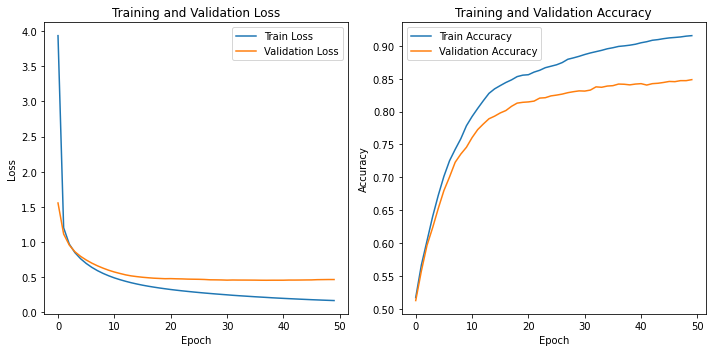

Training the neural network... for lr = 0.1
Epoch 1/50, Train Loss: 1.4252, Val Loss: 1.4177, Train Accuracy: 0.1980, Val Accuracy: 0.2024
Epoch 2/50, Train Loss: 1.3970, Val Loss: 1.4177, Train Accuracy: 0.1980, Val Accuracy: 0.2024
Epoch 3/50, Train Loss: 1.3970, Val Loss: 1.4177, Train Accuracy: 0.1980, Val Accuracy: 0.2024
Epoch 4/50, Train Loss: 1.3970, Val Loss: 1.4177, Train Accuracy: 0.1980, Val Accuracy: 0.2024
Epoch 5/50, Train Loss: 1.3970, Val Loss: 1.4177, Train Accuracy: 0.1980, Val Accuracy: 0.2024
Epoch 6/50, Train Loss: 1.3970, Val Loss: 1.4177, Train Accuracy: 0.1980, Val Accuracy: 0.2024
Epoch 7/50, Train Loss: 1.3970, Val Loss: 1.4177, Train Accuracy: 0.1980, Val Accuracy: 0.2024
Epoch 8/50, Train Loss: 1.3970, Val Loss: 1.4177, Train Accuracy: 0.1980, Val Accuracy: 0.2024
Epoch 9/50, Train Loss: 1.3970, Val Loss: 1.4177, Train Accuracy: 0.1980, Val Accuracy: 0.2024
Epoch 10/50, Train Loss: 1.3970, Val Loss: 1.4177, Train Accuracy: 0.1980, Val Accuracy: 0.2024
Epoch

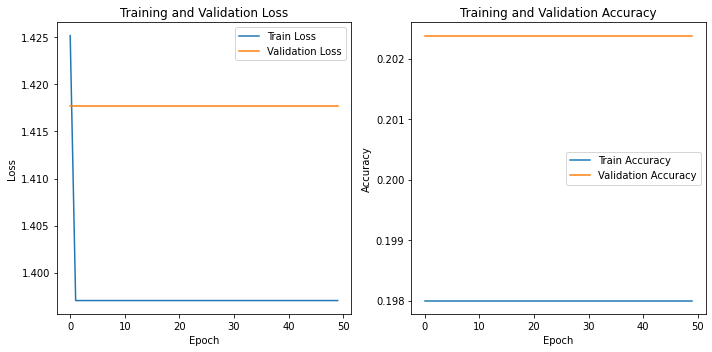

Training the neural network... for lr = 1
Epoch 1/50, Train Loss: 1.6207, Val Loss: 1.7448, Train Accuracy: 0.2417, Val Accuracy: 0.2311
Epoch 2/50, Train Loss: 1.6052, Val Loss: 1.7448, Train Accuracy: 0.2417, Val Accuracy: 0.2311
Epoch 3/50, Train Loss: 1.6052, Val Loss: 1.7448, Train Accuracy: 0.2417, Val Accuracy: 0.2311
Epoch 4/50, Train Loss: 1.6052, Val Loss: 1.7448, Train Accuracy: 0.2417, Val Accuracy: 0.2311
Epoch 5/50, Train Loss: 1.6052, Val Loss: 1.7448, Train Accuracy: 0.2417, Val Accuracy: 0.2311
Epoch 6/50, Train Loss: 1.6052, Val Loss: 1.7448, Train Accuracy: 0.2417, Val Accuracy: 0.2311
Epoch 7/50, Train Loss: 1.6052, Val Loss: 1.7448, Train Accuracy: 0.2417, Val Accuracy: 0.2311
Epoch 8/50, Train Loss: 1.6052, Val Loss: 1.7448, Train Accuracy: 0.2417, Val Accuracy: 0.2311
Epoch 9/50, Train Loss: 1.6052, Val Loss: 1.7448, Train Accuracy: 0.2417, Val Accuracy: 0.2311
Epoch 10/50, Train Loss: 1.6052, Val Loss: 1.7448, Train Accuracy: 0.2417, Val Accuracy: 0.2311
Epoch 1

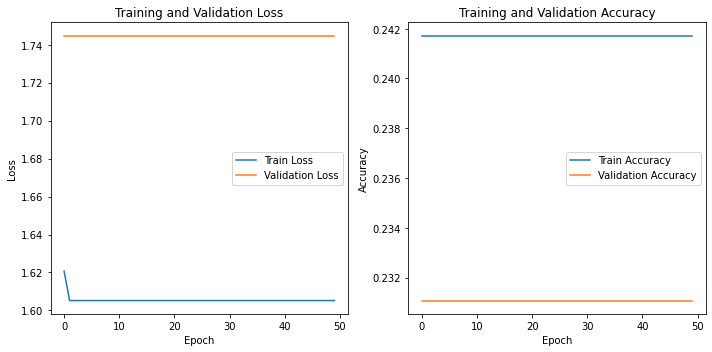

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the training data
x_train_df = pd.read_csv('Task_2/x_train.csv')
y_train_df = pd.read_csv('Task_2/y_train.csv')
x_test_df = pd.read_csv('Task_2/x_test.csv')
y_test_df = pd.read_csv('Task_2/y_test.csv')

# Extract the features and labels
X_train = x_train_df.values
y_train = y_train_df.values.reshape(-1)  # Reshape y_train to a 1D array

X_test = x_test_df.values
y_test = y_test_df.values.reshape(-1)  # Reshape y_train to a 1D array

# One-hot encode the labels
num_classes = np.unique(y_train).size
Y_train = np.zeros((y_train.size, num_classes))
Y_train[np.arange(y_train.size), y_train - 1] = 1  # One-hot encoding

num_classes = np.unique(y_train).size
Y_test = np.zeros((y_test.size, num_classes))
Y_test[np.arange(y_test.size), y_test - 1] = 1  # One-hot encoding

W0 = []
with open('Task_1/b/w-100-40-4.csv', 'r') as file:
    for line in file:
        # Split by delimiter (comma), skip the first column, and convert remaining values to float
        values = line.strip().split(',')[1:]
        W0.append([float(value) for value in values])

# Reading b0
b0 = []
with open('Task_1/b/b-100-40-4.csv', 'r') as file:
    for line in file:
        # Split by delimiter (comma), skip the first column, and convert remaining values to float
        values = line.strip().split(',')[1:]
        b0.append([float(value) for value in values])

W1 = np.array(W0[:14])
W2 = np.array(W0[14:114])
W3 = np.array(W0[114:])
b1 = np.array(b0[0])
b2 = np.array(b0[1])
b3 = np.array(b0[2])

# Split the training data into training and validation sets
# X_train, X_val, Y_train, Y_val = train_test_split(
#     X_train, Y_train, test_size=0.2, random_state=42
# )

nn = NeuralNetwork()

# Define network structure
nn.add_layer(input_size=14, output_size=100, w=W1, b=b1, activation='relu')
nn.add_layer(input_size=100, w=W2, b=b2, output_size=40, activation='relu')
nn.add_layer(input_size=40, w=W3, b=b3, output_size=4, activation='softmax')  # Output layer

# Training loop with validation
learning_rate = 0.001  # Adjust learning rate as needed
epochs = 50  # Adjust number of epochs as needed
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

print("Training the neural network... for lr = 0.001")
for epoch in range(epochs):
    epoch_train_loss = 0
    for i in range(X_train.shape[0]):
        X = X_train[i]
        Y = Y_train[i].reshape(1, -1)

        # Forward pass
        A = nn.forward(X)

        # Compute loss
        loss = nn.compute_loss(A, Y)
        epoch_train_loss += loss

        # Backward propagation
        gradients = nn.backward(X, Y)

        # Update parameters
        nn.update_parameters(gradients, learning_rate)

    # Calculate average training loss
    avg_train_loss = epoch_train_loss / X_train.shape[0]
    train_losses.append(avg_train_loss)

    # Calculate validation loss
    total_val_loss = 0
    for i in range(X_test.shape[0]):
        X = X_test[i]
        Y = Y_test[i].reshape(1, -1)

        A = nn.forward(X)

        # Compute loss
        loss = nn.compute_loss(A, Y)
        total_val_loss += loss

    # Calculate average validation loss
    avg_val_loss = total_val_loss / X_test.shape[0]
    val_losses.append(avg_val_loss)

    # Calculate accuracy for training and validation sets
    train_accuracy = calculate_accuracy(X_train, Y_train,nn)
    val_accuracy = calculate_accuracy(X_test, Y_test, nn)

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print losses and accuracies for this epoch
    print(f"Epoch {epoch + 1}/{epochs}, "
          f"Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, "
          f"Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")

# Plot the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Plot the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

####################### lr =0.1 #############################

W1 = np.array(W0[:14])
W2 = np.array(W0[14:114])
W3 = np.array(W0[114:])
b1 = np.array(b0[0])
b2 = np.array(b0[1])
b3 = np.array(b0[2])

# Split the training data into training and validation sets
# X_train, X_val, Y_train, Y_val = train_test_split(
#     X_train, Y_train, test_size=0.2, random_state=42
# )

nn = NeuralNetwork()

# Define network structure
nn.add_layer(input_size=14, output_size=100, w=W1, b=b1, activation='relu')
nn.add_layer(input_size=100, w=W2, b=b2, output_size=40, activation='relu')
nn.add_layer(input_size=40, w=W3, b=b3, output_size=4, activation='softmax')  # Output layer

# Training loop with validation
learning_rate = 0.1  # Adjust learning rate as needed
epochs = 50  # Adjust number of epochs as needed
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

print("Training the neural network... for lr = 0.1")

for epoch in range(epochs):
    epoch_train_loss = 0
    for i in range(X_train.shape[0]):
        X = X_train[i]
        Y = Y_train[i].reshape(1, -1)

        # Forward pass
        A = nn.forward(X)
        #         print(A)

        # Compute loss
        loss = nn.compute_loss(A, Y)
        epoch_train_loss += loss

        # Backward propagation
        gradients = nn.backward(X, Y)
        #         print('gradients',gradients)

        # Update parameters
        nn.update_parameters(gradients, learning_rate)

    # Calculate average training loss
    avg_train_loss = epoch_train_loss / X_train.shape[0]
    train_losses.append(avg_train_loss)

    # Calculate validation loss
    total_val_loss = 0
    for i in range(X_test.shape[0]):
        X = X_test[i]
        Y = Y_test[i].reshape(1, -1)

        A = nn.forward(X)

        # Compute loss
        loss = nn.compute_loss(A, Y)
        total_val_loss += loss

    # Calculate average validation loss
    avg_val_loss = total_val_loss / X_test.shape[0]
    val_losses.append(avg_val_loss)

    # Calculate accuracy for training and validation sets
    train_accuracy = calculate_accuracy(X_train, Y_train,nn)
    val_accuracy = calculate_accuracy(X_test, Y_test,nn)

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print losses and accuracies for this epoch
    print(f"Epoch {epoch + 1}/{epochs}, "
          f"Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, "
          f"Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")

# Plot the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Plot the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


####################### lr =1 #############################

W1 = np.array(W0[:14])
W2 = np.array(W0[14:114])
W3 = np.array(W0[114:])
b1 = np.array(b0[0])
b2 = np.array(b0[1])
b3 = np.array(b0[2])

# Split the training data into training and validation sets
# X_train, X_val, Y_train, Y_val = train_test_split(
#     X_train, Y_train, test_size=0.2, random_state=42
# )

nn = NeuralNetwork()

# Define network structure
nn.add_layer(input_size=14, output_size=100, w=W1, b=b1, activation='relu')
nn.add_layer(input_size=100, w=W2, b=b2, output_size=40, activation='relu')
nn.add_layer(input_size=40, w=W3, b=b3, output_size=4, activation='softmax')  # Output layer

# Training loop with validation
learning_rate = 1  # Adjust learning rate as needed
epochs = 50  # Adjust number of epochs as needed
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

print("Training the neural network... for lr = 1")

for epoch in range(epochs):
    epoch_train_loss = 0
    for i in range(X_train.shape[0]):
        X = X_train[i]
        Y = Y_train[i].reshape(1, -1)

        # Forward pass
        A = nn.forward(X)
        #         print(A)

        # Compute loss
        loss = nn.compute_loss(A, Y)
        epoch_train_loss += loss

        # Backward propagation
        gradients = nn.backward(X, Y)
        #         print('gradients',gradients)

        # Update parameters
        nn.update_parameters(gradients, learning_rate)

    # Calculate average training loss
    avg_train_loss = epoch_train_loss / X_train.shape[0]
    train_losses.append(avg_train_loss)

    # Calculate validation loss
    total_val_loss = 0
    for i in range(X_test.shape[0]):
        X = X_test[i]
        Y = Y_test[i].reshape(1, -1)

        A = nn.forward(X)

        # Compute loss
        loss = nn.compute_loss(A, Y)
        total_val_loss += loss

    # Calculate average validation loss
    avg_val_loss = total_val_loss / X_test.shape[0]
    val_losses.append(avg_val_loss)

    # Calculate accuracy for training and validation sets
    train_accuracy = calculate_accuracy(X_train, Y_train,nn)
    val_accuracy = calculate_accuracy(X_test, Y_test,nn)

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print losses and accuracies for this epoch
    print(f"Epoch {epoch + 1}/{epochs}, "
          f"Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, "
          f"Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")

# Plot the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Plot the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

